### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
#boston

In [16]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
X.shape, y.shape

((506, 13), (506, 1))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

StandardScaler(copy=True, with_mean=False, with_std=True)

In [46]:
### Я не понял для чего мы делаем маштабирование и как оно работает "под капотом"
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [54]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [56]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 22.105547  ,  27.67476   ],
       [  2.5676367 ,  -9.612873  ],
       [-19.178112  , -10.068454  ],
       [ 31.69884   ,  22.650074  ],
       [  3.7838044 ,  -9.064543  ],
       [-11.470667  ,  -7.1676817 ],
       [ -9.775993  ,  -8.149062  ],
       [-27.205067  , -13.573678  ],
       [ 31.698051  ,  24.072002  ],
       [ 28.505928  ,  23.64129   ],
       [-10.286473  ,  -8.5917635 ],
       [ -4.3393855 , -10.535677  ],
       [ -5.4770155 , -15.228341  ],
       [ 29.163446  ,  22.78839   ],
       [ -6.7677975 , -16.096998  ],
       [  7.043765  , -10.342373  ],
       [  0.9259485 ,  -6.82238   ],
       [-19.530344  , -11.406928  ],
       [-17.710241  ,  -4.06173   ],
       [-19.57726   ,  -7.73832   ],
       [ 27.435802  ,  27.351105  ],
       [  0.18039143,  -4.1474752 ],
       [-12.696128  ,  -6.4009237 ],
       [ -7.4195085 ,  -7.51007   ],
       [-26.828901  , -13.600278  ],
       [ -4.909909  , -14.60052   ],
       [  2.1410577 ,  10.176035  ],
 

In [60]:
X_train_tsne.shape

(404, 2)

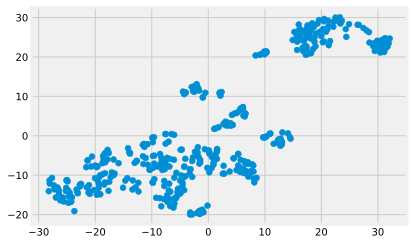

In [88]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [106]:
labels_train = kmeans.fit_predict(X_train_scaled)
### А как разбить на кластеры используя не все признаки из датафрейма?
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

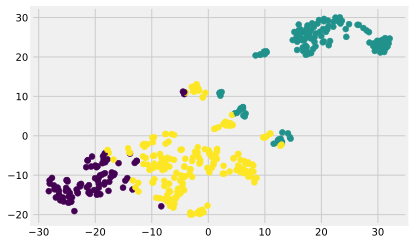

In [109]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()
### Как сюда можно добавить легенду с цветом и названием кластера?

In [145]:
### Кластер 0
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [146]:
### Кластер 1
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [147]:
### Кластер 2
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [148]:
### Здесь нужно среднее "сырых" данных или тех которые мы маштабировали?
### Кластер 0
X_train.loc[labels_train==0, 'CRIM'].mean(), X_train_scaled.loc[labels_train==0, 'CRIM'].mean()

(0.07356558139534884, 0.008299302991793798)

In [149]:
### Кластер 1
X_train.loc[labels_train==1, 'CRIM'].mean(), X_train_scaled.loc[labels_train==1, 'CRIM'].mean()

(10.797028425196851, 1.2180670445620148)

In [151]:
### Кластер 2
X_train.loc[labels_train==2, 'CRIM'].mean(), X_train_scaled.loc[labels_train==2, 'CRIM'].mean()

(0.4216602094240837, 0.047569607569429906)

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [132]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

In [152]:
### Кластер 0
y_test[labels_test==0].mean()

price    31.35
dtype: float64

In [153]:
### Кластер 1
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [154]:
### Кластер 2
y_test[labels_test==2].mean()

price    21.860784
dtype: float64

In [155]:
### Кластер 0
X_test.loc[labels_test==0, 'CRIM'].mean(), X_test_scaled.loc[labels_test==0, 'CRIM'].mean()

(0.06206, 0.007001300525347133)

In [156]:
### Кластер 1
X_test.loc[labels_test==1, 'CRIM'].mean(), X_test_scaled.loc[labels_test==1, 'CRIM'].mean()

(10.165531142857143, 1.1468246621159903)

In [157]:
### Кластер 2
X_test.loc[labels_test==0, 'CRIM'].mean(), X_test_scaled.loc[labels_test==0, 'CRIM'].mean()

(0.06206, 0.007001300525347133)